In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("MHA_population_Final.csv")

In [5]:
df.head(20)

Unnamed: 0  Census Year    District Taluka   Town/Village  \
0            0         2011  AHMADNAGAR  AKOLA     ABIT KHIND   
1            1         2011  AHMADNAGAR  AKOLA           AGAR   
2            2         2011  AHMADNAGAR  AKOLA    AGASTINAGAR   
3            4         2011  AHMADNAGAR  AKOLA          AMBAD   
4            5         2011  AHMADNAGAR  AKOLA     AMBEVANGAN   
5            6         2011  AHMADNAGAR  AKOLA         AMBHOL   
6            7         2011  AHMADNAGAR  AKOLA    AMBIKANAGAR   
7            8         2011  AHMADNAGAR  AKOLA          AMBIT   
8            9         2011  AHMADNAGAR  AKOLA      AURANGPUR   
9           10         2011  AHMADNAGAR  AKOLA   BABHUL WANDI   
10          11         2011  AHMADNAGAR  AKOLA          BADGI   
11          12         2011  AHMADNAGAR  AKOLA      BAHIRWADI   
12          13         2011  AHMADNAGAR  AKOLA        BALTHAN   
13          14         2011  AHMADNAGAR  AKOLA      BARAVWADI   
14          15         2011  AHMADNAGAR  AKOLA           BARI   
15          16         2011  AHMADNAGAR  AKOLA        BELAPUR   
16          17         2011  AHMADNAGAR  AKOLA    BHANDARDARA   
17          18         2011  AHMADNAGAR  AKOLA  BHOJADARAWADI   
18          19         2011  AHMADNAGAR  AKOLA      BHOLEWADI   
19          20         2011  AHMADNAGAR  AKOLA         BITAKA   

    No. of households  Total population  Total male population  \
0                 201               732                    359   
1                  37               247                    162   
2                 357              1536                    799   
3                 529              2590                   1352   
4                 194               765                    378   
5                 331              1434                    741   
6                 120               645                    318   
7                 156               692                    328   
8                 205              1004                    510   
9                 300              1477                    744   
10                109               478                    237   
11                258              1052                    547   
12                205              1072                    545   
13                328              1509                    747   
14                201              1073                    561   
15                759              3166                   1530   
16                393              1765                    883   
17                 81               387                    189   
18                103               541                    282   
19                 56               212                    101   

    Total female population  Total 0 to 6 year children  \
0                       373                          73   
1                        85                          27   
2                       737                         178   
3                      1238                         333   
4                       387                          96   
5                       693                         143   
6                       327                          97   
7                       364                         129   
8                       494                         108   
9                       733                         224   
10                      241                          37   
11                      505                          91   
12                      527                         172   
13                      762                         174   
14                      512                         116   
15                     1636                         352   
16                      882                         180   
17                      198                          43   
18                      259                          37   
19                      111                          31   

    Male 0 

In [6]:
df.columns

Index(['Unnamed: 0', 'Census Year', 'District', 'Taluka', 'Town/Village',
       'No. of households', 'Total population', 'Total male population',
       'Total female population', 'Total 0 to 6 year children',
       'Male 0 to 6 year children', 'Female 0 to 6 year children',
       'Total SC population', 'Male SC population', 'Female SC population',
       'Total ST population', 'Male ST population', 'Female ST population',
       'Total literates', 'Male literates', 'Female literates',
       'Total iliterates', 'Male iliterates', 'Female iliterates',
       'Total main workers', 'Male main workers', 'Female main workers',
       'Total non workers', 'Male non workers', 'Female non workers'],
      dtype='object')

In [7]:
pd.set_option('display.max_columns',None)

df

Unnamed: 0  Census Year    District    Taluka Town/Village  \
0                0         2011  AHMADNAGAR     AKOLA   ABIT KHIND   
1                1         2011  AHMADNAGAR     AKOLA         AGAR   
2                2         2011  AHMADNAGAR     AKOLA  AGASTINAGAR   
3                4         2011  AHMADNAGAR     AKOLA        AMBAD   
4                5         2011  AHMADNAGAR     AKOLA   AMBEVANGAN   
...            ...          ...         ...       ...          ...   
117434      132310         1991    YAVATMAL  YAVATMAL     YELABARA   
117435      132311         1991    YAVATMAL  YAVATMAL        YERAD   
117436      132312         1991    YAVATMAL  YAVATMAL       YEVATI   
117437      132313         1991    YAVATMAL  YAVATMAL         ZOLA   
117438      132314         1991    YAVATMAL  YAVATMAL         ZULI   

        No. of households  Total population  Total male population  \
0                     201               732                    359   
1                      37               247                    162   
2                     357              1536                    799   
3                     529              2590                   1352   
4                     194               765                    378   
...                   ...               ...                    ...   
117434                489              2381                   1237   
117435                234              1162                    588   
117436                103               461                    232   
117437                  0                 0                      0   
117438                124               592                    306   

        Total female population  Total 0 to 6 year children  \
0                           373                          73   
1                            85                          27   
2                           737                         178   
3                          1238                         333   
4                           387                          96   
...                         ...                         ...   
117434                     1144                         364   
117435                      574                         189   
117436                      229                          77   
117437                        0                           0   
117438                      286                          98   

        Male 0 to 6 year children  Female 0 to 6 year children  \
0                              36                           37   
1                              15                           12   
2                              97                           81   
3                             189                          144   
4                              46                           50   
...                           ...                          ...   
117434                        175                          189   
117435                         94                           95   
117436                         37                           40   
117437                          0                            0   
117438                         52                           46   

        Total SC population  Male SC population  Female SC population  \
0                        12                   5                     7   
1                         9                   4                     5   
2                       157                  84                    73   
3                        87                  45                    42   
4                         5                   1                     4   
...                     ...                 ...                   ...   
117434                  270                 152                   118   
117435                  245                 125                   120   
117436                   23                   9                    14   
117437                    0                   

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117439 entries, 0 to 117438
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   117439 non-null  int64  
 1   Census Year                  117439 non-null  int64  
 2   District                     117439 non-null  object 
 3   Taluka                       117439 non-null  object 
 4   Town/Village                 117439 non-null  object 
 5   No. of households            117439 non-null  int64  
 6   Total population             117439 non-null  int64  
 7   Total male population        117439 non-null  int64  
 8   Total female population      117439 non-null  int64  
 9   Total 0 to 6 year children   117439 non-null  int64  
 10  Male 0 to 6 year children    117439 non-null  int64  
 11  Female 0 to 6 year children  117439 non-null  int64  
 12  Total SC population          117439 non-null  int64  
 13 

In [9]:
df.isnull().sum()

Unnamed: 0                     0
Census Year                    0
District                       0
Taluka                         0
Town/Village                   0
No. of households              0
Total population               0
Total male population          0
Total female population        0
Total 0 to 6 year children     0
Male 0 to 6 year children      0
Female 0 to 6 year children    0
Total SC population            0
Male SC population             0
Female SC population           0
Total ST population            0
Male ST population             0
Female ST population           0
Total literates                0
Male literates                 0
Female literates               0
Total iliterates               0
Male iliterates                0
Female iliterates              0
Total main workers             0
Male main workers              0
Female main workers            0
Total non workers              0
Male non workers               0
Female non workers             0
dtype: int

In [10]:
#cols=['Total iliterates','Male iliterates','Female iliterates']
mode=df['Total iliterates'].mode()
df['Total iliterates'] =  df['Total iliterates'].fillna(mode[0])

In [11]:
#cols=['Total iliterates','Male iliterates','Female iliterates']
mode=df['Male iliterates'].mode()
df['Male iliterates'] =  df['Male iliterates'].fillna(mode[0])

In [12]:
#cols=['Total iliterates','Male iliterates','Female iliterates']
mode=df['Female iliterates'].mode()
df['Female iliterates'] =  df['Female iliterates'].fillna(mode[0])

In [13]:
df.isnull().sum()


Unnamed: 0                     0
Census Year                    0
District                       0
Taluka                         0
Town/Village                   0
No. of households              0
Total population               0
Total male population          0
Total female population        0
Total 0 to 6 year children     0
Male 0 to 6 year children      0
Female 0 to 6 year children    0
Total SC population            0
Male SC population             0
Female SC population           0
Total ST population            0
Male ST population             0
Female ST population           0
Total literates                0
Male literates                 0
Female literates               0
Total iliterates               0
Male iliterates                0
Female iliterates              0
Total main workers             0
Male main workers              0
Female main workers            0
Total non workers              0
Male non workers               0
Female non workers             0
dtype: int

In [14]:
df = df.dropna(subset=['Taluka', 'Town/Village'])

In [15]:
df.isnull().sum()

Unnamed: 0                     0
Census Year                    0
District                       0
Taluka                         0
Town/Village                   0
No. of households              0
Total population               0
Total male population          0
Total female population        0
Total 0 to 6 year children     0
Male 0 to 6 year children      0
Female 0 to 6 year children    0
Total SC population            0
Male SC population             0
Female SC population           0
Total ST population            0
Male ST population             0
Female ST population           0
Total literates                0
Male literates                 0
Female literates               0
Total iliterates               0
Male iliterates                0
Female iliterates              0
Total main workers             0
Male main workers              0
Female main workers            0
Total non workers              0
Male non workers               0
Female non workers             0
dtype: int

In [16]:
df.describe()


Unnamed: 0    Census Year  No. of households  Total population  \
count  117439.000000  117439.000000      117439.000000     117439.000000   
mean    64334.404431    2000.826889         211.985593       1040.530352   
std     37844.236543       8.179751         160.855155        790.998008   
min         0.000000    1991.000000           0.000000          0.000000   
25%     31752.500000    1991.000000          95.000000        457.000000   
50%     63284.000000    2001.000000         172.000000        843.000000   
75%     95925.500000    2011.000000         291.000000       1434.000000   
max    132314.000000    2011.000000        1183.000000       3737.000000   

       Total male population  Total female population  \
count          117439.000000            117439.000000   
mean              528.257862               512.272490   
std               407.000640               385.886966   
min                 0.000000                 0.000000   
25%               228.000000               228.000000   
50%               425.000000               417.000000   
75%               729.000000               706.000000   
max              2571.000000              2000.000000   

       Total 0 to 6 year children  Male 0 to 6 year children  \
count               117439.000000              117439.000000   
mean                   158.871882                  82.414854   
std                    125.502255                  65.515148   
min                      0.000000                   0.000000   
25%                     67.000000                  34.000000   
50%                    128.000000                  66.000000   
75%                    219.000000                 114.000000   
max                    982.000000                 510.000000   

       Female 0 to 6 year children  Total SC population  Male SC population  \
count                117439.000000        117439.000000       117439.000000   
mean                     76.457029           116.429721           59.369426   
std                      60.823726           158.299394           81.118240   
min                       0.000000             0.000000            0.000000   
25%                      32.000000             1.000000            1.000000   
50%                      61.000000            54.000000           27.000000   
75%                     105.000000           171.000000           87.000000   
max                     516.000000          2020.000000         1027.000000   

       Female SC population  Total ST population  Male ST population  \
count         117439.000000        117439.000000       117439.000000   
mean              57.060295           167.318829           84.407675   
std               77.466676           328.732576          165.368461   
min                0.000000             0.000000            0.000000   
25%                0.000000             0.000000            0.000000   
50%               26.000000            28.000000           14.000000   
75%               84.000000           184.000000           93.000000   
max              993.000000          3712.000000         1892.000000   

       Female ST population  Total literates  Male literates  \
count         117439.000000    117439.000000   117439.000000   
mean              82.911154       588.752893      349.545483   
std              163.865647       505.925507      291.987476   
min                0.000000         0.000000        0.000000   
25%                0.000000       219.000000      135.000000   
50%               14.000000       448.000000      271.000000   
75%               91.000000       817.000000      485.000000   
max             1887.000000      3197.000000     2135.000000   

       Female literates  Total iliterates  Male iliterates  Female iliterates  \
count     117439.000000     117439.000000    117439.000000      117439.000000   
mean         239.207410        341.118181       123.404934         202.949446   
std          218.846634        277.645430       119.2

In [17]:
df.shape

(117439, 30)

In [18]:
#Drop duplicates
df.drop_duplicates(keep=False, inplace=True)

<AxesSubplot:xlabel='Total population'>

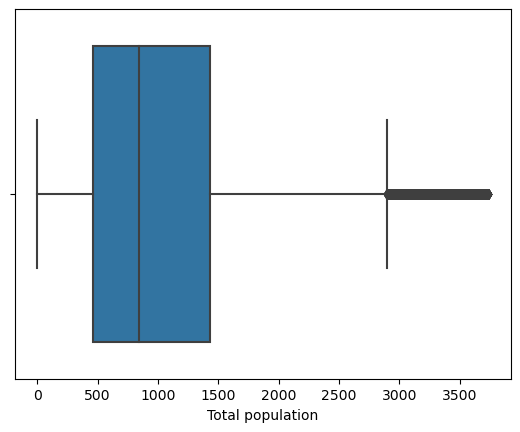

In [19]:
sns.boxplot(df['Total population'])

In [20]:
# calculate the IQR for the column
q1 = df['Total population'].quantile(0.25)
q3 = df['Total population'].quantile(0.75)
iqr = q3 - q1

# identify and remove outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['Total population'] >= lower_bound) & (df['Total population'] <= upper_bound)]

<AxesSubplot:xlabel='No. of households'>

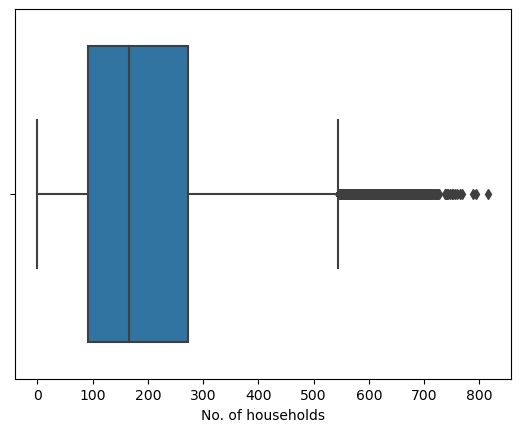

In [21]:
sns.boxplot(df['No. of households'])

<AxesSubplot:xlabel='Total male population'>

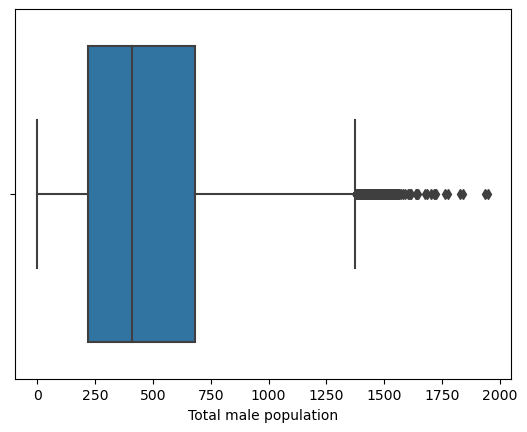

In [22]:
sns.boxplot(df['Total male population'])

<AxesSubplot:xlabel='Total female population'>

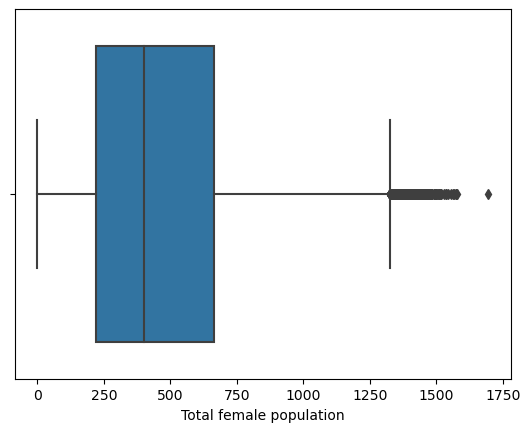

In [23]:
sns.boxplot(df['Total female population'])

<AxesSubplot:xlabel='Total 0 to 6 year children'>

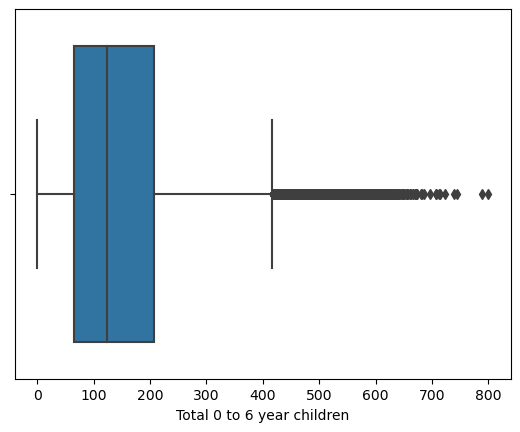

In [24]:
sns.boxplot(df['Total 0 to 6 year children'])

<AxesSubplot:xlabel='Male 0 to 6 year children'>

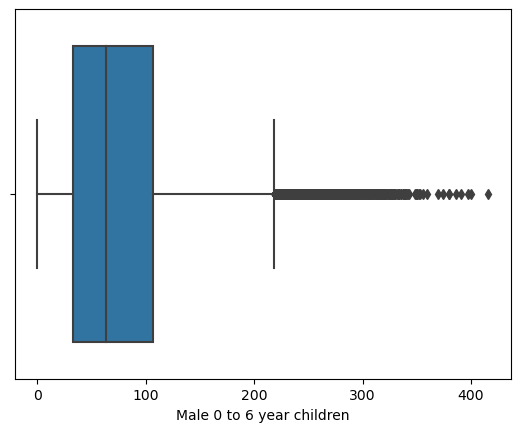

In [25]:
sns.boxplot(df['Male 0 to 6 year children'])

<AxesSubplot:xlabel='Female 0 to 6 year children'>

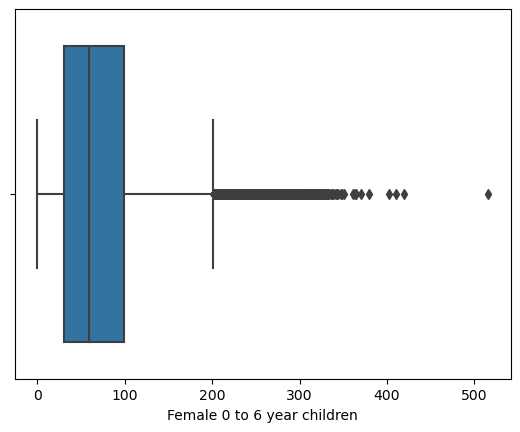

In [26]:
sns.boxplot(df['Female 0 to 6 year children'])

<AxesSubplot:xlabel='Total ST population'>

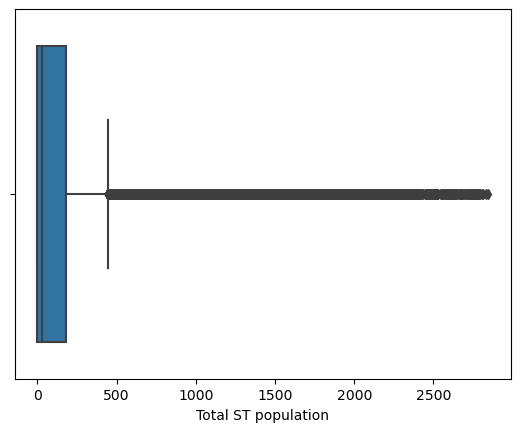

In [27]:
sns.boxplot(df['Total ST population'])

<AxesSubplot:xlabel='Male ST population'>

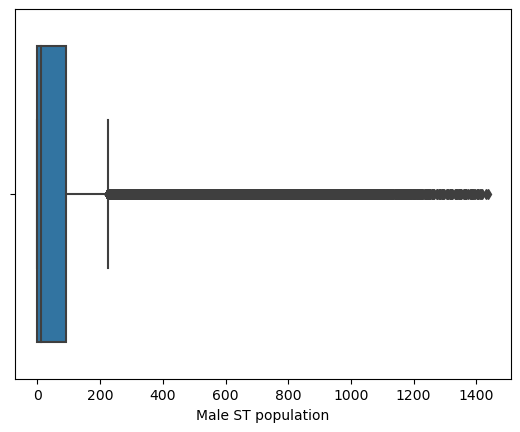

In [28]:
sns.boxplot(df['Male ST population'])

<AxesSubplot:xlabel='Female ST population'>

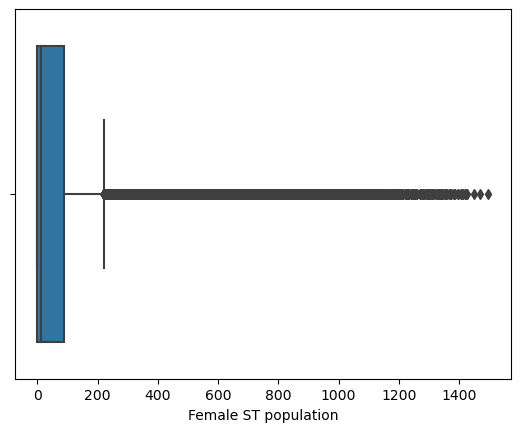

In [29]:
sns.boxplot(df['Female ST population'])

<AxesSubplot:xlabel='Total literates'>

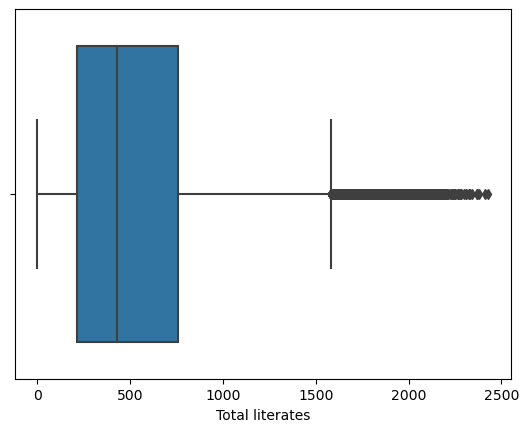

In [30]:
sns.boxplot(df['Total literates'])

<AxesSubplot:xlabel='Male literates'>

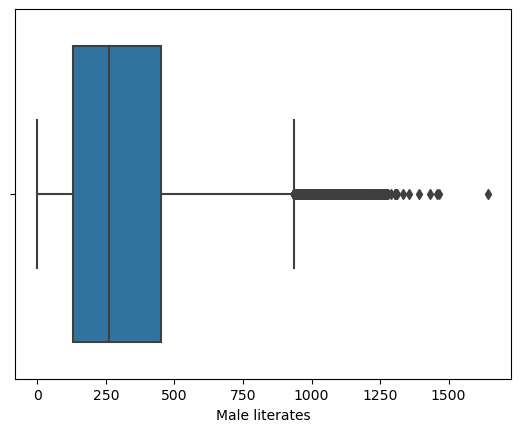

In [31]:
sns.boxplot(df['Male literates'])

<AxesSubplot:xlabel='Female literates'>

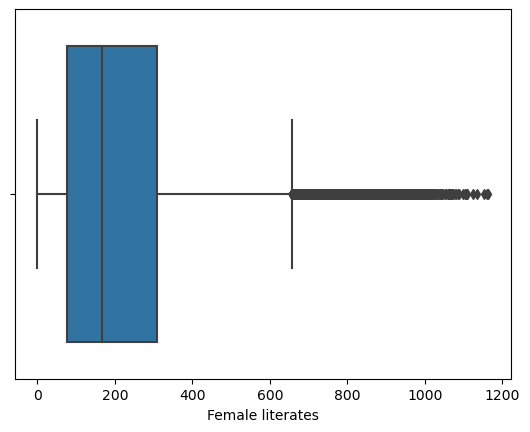

In [32]:
sns.boxplot(df['Female literates'])

<AxesSubplot:xlabel='Total iliterates'>

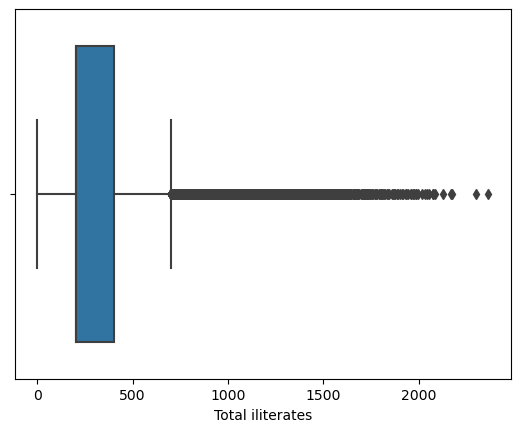

In [33]:
sns.boxplot(df['Total iliterates'])

<AxesSubplot:xlabel='Male iliterates'>

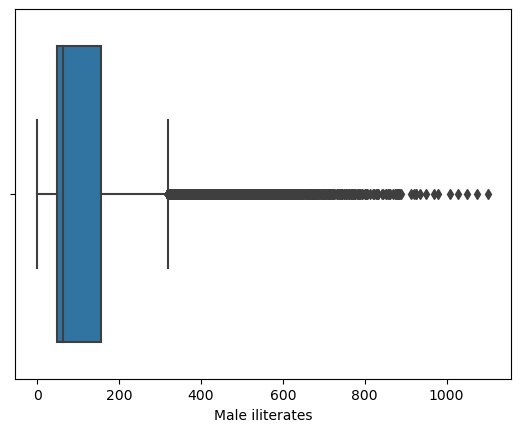

In [34]:
sns.boxplot(df['Male iliterates'])

<AxesSubplot:xlabel='Female iliterates'>

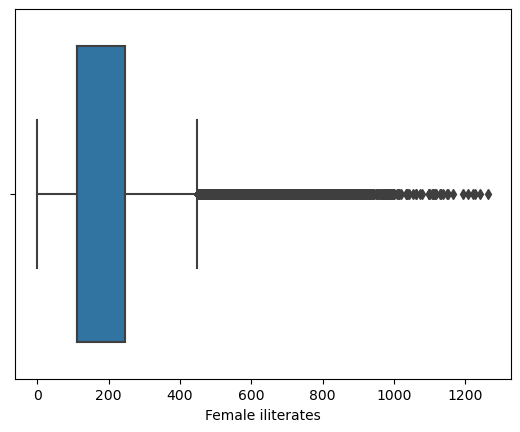

In [35]:
sns.boxplot(df['Female iliterates'])

<AxesSubplot:xlabel='Male main workers'>

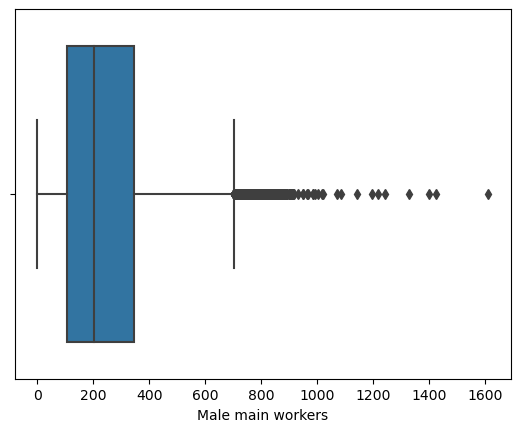

In [36]:
sns.boxplot(df['Male main workers'])

<AxesSubplot:xlabel='Total main workers'>

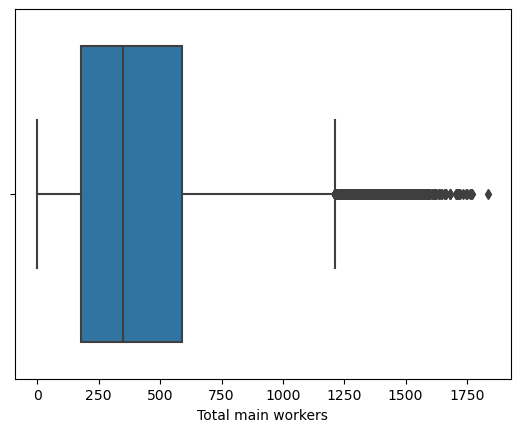

In [37]:
sns.boxplot(df['Total main workers'])

<AxesSubplot:xlabel='Female main workers'>

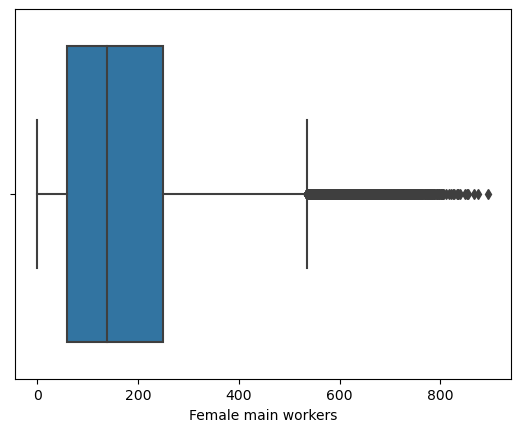

In [38]:
sns.boxplot(df['Female main workers'])

<AxesSubplot:xlabel='Total non workers'>

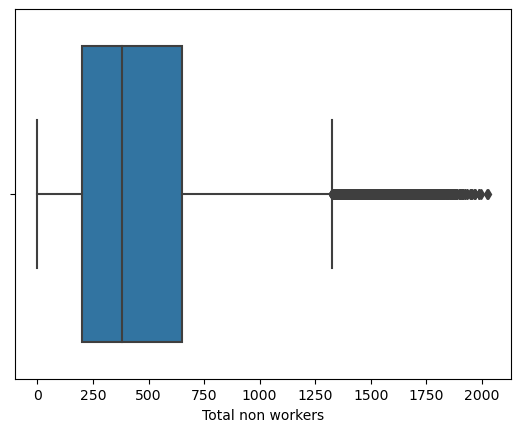

In [39]:
sns.boxplot(df['Total non workers'])

<AxesSubplot:xlabel='Male non workers'>

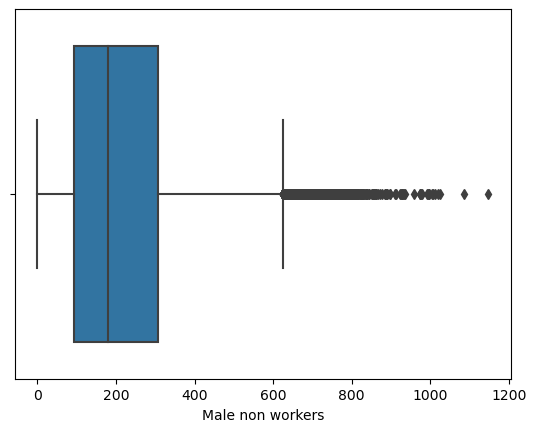

In [40]:
sns.boxplot(df['Male non workers'])

<AxesSubplot:xlabel='Female non workers'>

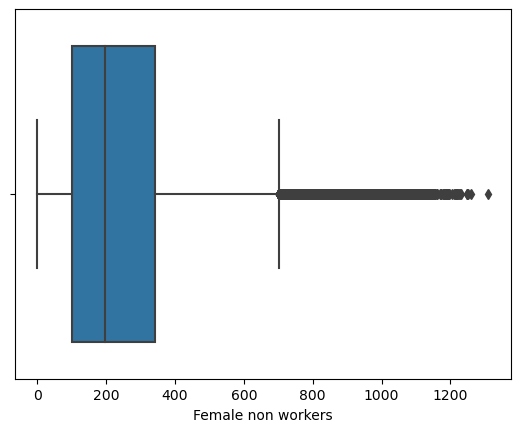

In [41]:
sns.boxplot(df['Female non workers'])

In [42]:
df.describe()

Unnamed: 0    Census Year  No. of households  Total population  \
count  113015.000000  113015.000000      113015.000000     113015.000000   
mean    64586.167810    2000.769500         194.535637        953.165845   
std     37845.511571       8.176569         136.052401        667.359217   
min         0.000000    1991.000000           0.000000          0.000000   
25%     32034.500000    1991.000000          92.000000        443.000000   
50%     63594.000000    2001.000000         165.000000        809.000000   
75%     96247.500000    2011.000000         273.000000       1345.000000   
max    132314.000000    2011.000000         816.000000       2899.000000   

       Total male population  Total female population  \
count          113015.000000            113015.000000   
mean              483.150812               470.015033   
std               342.657115               326.644378   
min                 0.000000                 0.000000   
25%               221.000000               221.000000   
50%               408.000000               401.000000   
75%               683.000000               663.000000   
max              1951.000000              1695.000000   

       Total 0 to 6 year children  Male 0 to 6 year children  \
count               113015.000000              113015.000000   
mean                   146.307764                  75.814131   
std                    108.233394                  56.436416   
min                      0.000000                   0.000000   
25%                     65.000000                  33.000000   
50%                    123.000000                  63.000000   
75%                    206.000000                 107.000000   
max                    800.000000                 416.000000   

       Female 0 to 6 year children  Total SC population  Male SC population  \
count                113015.000000        113015.000000       113015.000000   
mean                     70.493634           105.492351           53.758519   
std                      52.668349           141.817068           72.629052   
min                       0.000000             0.000000            0.000000   
25%                      31.000000             0.000000            0.000000   
50%                      59.000000            48.000000           24.000000   
75%                      99.000000           157.000000           80.000000   
max                     516.000000          1590.000000          824.000000   

       Female SC population  Total ST population  Male ST population  \
count         113015.000000        113015.000000       113015.000000   
mean              51.733832           159.846790           80.601256   
std               69.471264           306.533723          154.199260   
min                0.000000             0.000000            0.000000   
25%                0.000000             0.000000            0.000000   
50%               24.000000            26.000000           13.000000   
75%               77.000000           178.000000           90.000000   
max              766.000000          2846.000000         1438.000000   

       Female ST population  Total literates  Male literates  \
count         113015.000000    113015.000000   113015.000000   
mean              79.245534       534.702040      317.849462   
std              152.817289       425.705957      245.497309   
min                0.000000         0.000000        0.000000   
25%                0.000000       211.000000      130.000000   
50%               13.000000       429.000000      260.000000   
75%               88.000000       760.000000      452.000000   
max             1497.000000      2430.000000     1645.000000   

       Female literates  Total iliterates  Male iliterates  Female iliterates  \
count     113015.000000     113015.000000    113015.000000      113015.000000   
mean         216.852577        319.085856       114.432792         189.772092   
std          185.118301        238.857191       103.4

In [43]:
df.to_csv("MHA_population_Final.csv")

PermissionError: [Errno 13] Permission denied: 'MHA_population_Final.csv'

In [44]:
df.to_csv("Final_MHA_pop.csv")

In [45]:
dataset = pd.read_csv("MHA_population_Final.csv")
dataset

Unnamed: 0  Census Year    District    Taluka Town/Village  \
0                0         2011  AHMADNAGAR     AKOLA   ABIT KHIND   
1                1         2011  AHMADNAGAR     AKOLA         AGAR   
2                2         2011  AHMADNAGAR     AKOLA  AGASTINAGAR   
3                4         2011  AHMADNAGAR     AKOLA        AMBAD   
4                5         2011  AHMADNAGAR     AKOLA   AMBEVANGAN   
...            ...          ...         ...       ...          ...   
117434      132310         1991    YAVATMAL  YAVATMAL     YELABARA   
117435      132311         1991    YAVATMAL  YAVATMAL        YERAD   
117436      132312         1991    YAVATMAL  YAVATMAL       YEVATI   
117437      132313         1991    YAVATMAL  YAVATMAL         ZOLA   
117438      132314         1991    YAVATMAL  YAVATMAL         ZULI   

        No. of households  Total population  Total male population  \
0                     201               732                    359   
1                      37               247                    162   
2                     357              1536                    799   
3                     529              2590                   1352   
4                     194               765                    378   
...                   ...               ...                    ...   
117434                489              2381                   1237   
117435                234              1162                    588   
117436                103               461                    232   
117437                  0                 0                      0   
117438                124               592                    306   

        Total female population  Total 0 to 6 year children  \
0                           373                          73   
1                            85                          27   
2                           737                         178   
3                          1238                         333   
4                           387                          96   
...                         ...                         ...   
117434                     1144                         364   
117435                      574                         189   
117436                      229                          77   
117437                        0                           0   
117438                      286                          98   

        Male 0 to 6 year children  Female 0 to 6 year children  \
0                              36                           37   
1                              15                           12   
2                              97                           81   
3                             189                          144   
4                              46                           50   
...                           ...                          ...   
117434                        175                          189   
117435                         94                           95   
117436                         37                           40   
117437                          0                            0   
117438                         52                           46   

        Total SC population  Male SC population  Female SC population  \
0                        12                   5                     7   
1                         9                   4                     5   
2                       157                  84                    73   
3                        87                  45                    42   
4                         5                   1                     4   
...                     ...                 ...                   ...   
117434                  270                 152                   118   
117435                  245                 125                   120   
117436                   23                   9                    14   
117437                    0                   

In [46]:
dataset.head()


Unnamed: 0  Census Year    District Taluka Town/Village  No. of households  \
0           0         2011  AHMADNAGAR  AKOLA   ABIT KHIND                201   
1           1         2011  AHMADNAGAR  AKOLA         AGAR                 37   
2           2         2011  AHMADNAGAR  AKOLA  AGASTINAGAR                357   
3           4         2011  AHMADNAGAR  AKOLA        AMBAD                529   
4           5         2011  AHMADNAGAR  AKOLA   AMBEVANGAN                194   

   Total population  Total male population  Total female population  \
0               732                    359                      373   
1               247                    162                       85   
2              1536                    799                      737   
3              2590                   1352                     1238   
4               765                    378                      387   

   Total 0 to 6 year children  Male 0 to 6 year children  \
0                          73                         36   
1                          27                         15   
2                         178                         97   
3                         333                        189   
4                          96                         46   

   Female 0 to 6 year children  Total SC population  Male SC population  \
0                           37                   12                   5   
1                           12                    9                   4   
2                           81                  157                  84   
3                          144                   87                  45   
4                           50                    5                   1   

   Female SC population  Total ST population  Male ST population  \
0                     7                  695                 344   
1                     5                  121                  99   
2                    73                   59                  35   
3                    42                  425                 219   
4                     4                  746                 367   

   Female ST population  Total literates  Male literates  Female literates  \
0                   351              419             244               175   
1                    22              189             136                53   
2                    24             1074             607               467   
3                   206             1745            1002               743   
4                   379              370             236               134   

   Total iliterates  Male iliterates  Female iliterates  Total main workers  \
0             313.0            115.0              198.0                 424   
1              58.0             26.0               32.0                 106   
2             462.0            192.0              270.0                 787   
3             845.0            350.0              495.0                1491   
4             395.0            142.0              253.0                 537   

   Male main workers  Female main workers  Total non workers  \
0                204                  220                285   
1                 58                   48                140   
2                439                  348                681   
3                763                  728               1083   
4                259                  278                222   

   Male non workers  Female non workers  
0               143                 142  
1               103                  37  
2               332                 349  
3               580                 503  
4               116                 106

In [47]:
dataset['Census Year'].unique()

array([2011, 2001, 1991], dtype=int64)

In [48]:
dataset.describe() 


Unnamed: 0    Census Year  No. of households  Total population  \
count  117439.000000  117439.000000      117439.000000     117439.000000   
mean    64334.404431    2000.826889         211.985593       1040.530352   
std     37844.236543       8.179751         160.855155        790.998008   
min         0.000000    1991.000000           0.000000          0.000000   
25%     31752.500000    1991.000000          95.000000        457.000000   
50%     63284.000000    2001.000000         172.000000        843.000000   
75%     95925.500000    2011.000000         291.000000       1434.000000   
max    132314.000000    2011.000000        1183.000000       3737.000000   

       Total male population  Total female population  \
count          117439.000000            117439.000000   
mean              528.257862               512.272490   
std               407.000640               385.886966   
min                 0.000000                 0.000000   
25%               228.000000               228.000000   
50%               425.000000               417.000000   
75%               729.000000               706.000000   
max              2571.000000              2000.000000   

       Total 0 to 6 year children  Male 0 to 6 year children  \
count               117439.000000              117439.000000   
mean                   158.871882                  82.414854   
std                    125.502255                  65.515148   
min                      0.000000                   0.000000   
25%                     67.000000                  34.000000   
50%                    128.000000                  66.000000   
75%                    219.000000                 114.000000   
max                    982.000000                 510.000000   

       Female 0 to 6 year children  Total SC population  Male SC population  \
count                117439.000000        117439.000000       117439.000000   
mean                     76.457029           116.429721           59.369426   
std                      60.823726           158.299394           81.118240   
min                       0.000000             0.000000            0.000000   
25%                      32.000000             1.000000            1.000000   
50%                      61.000000            54.000000           27.000000   
75%                     105.000000           171.000000           87.000000   
max                     516.000000          2020.000000         1027.000000   

       Female SC population  Total ST population  Male ST population  \
count         117439.000000        117439.000000       117439.000000   
mean              57.060295           167.318829           84.407675   
std               77.466676           328.732576          165.368461   
min                0.000000             0.000000            0.000000   
25%                0.000000             0.000000            0.000000   
50%               26.000000            28.000000           14.000000   
75%               84.000000           184.000000           93.000000   
max              993.000000          3712.000000         1892.000000   

       Female ST population  Total literates  Male literates  \
count         117439.000000    117439.000000   117439.000000   
mean              82.911154       588.752893      349.545483   
std              163.865647       505.925507      291.987476   
min                0.000000         0.000000        0.000000   
25%                0.000000       219.000000      135.000000   
50%               14.000000       448.000000      271.000000   
75%               91.000000       817.000000      485.000000   
max             1887.000000      3197.000000     2135.000000   

       Female literates  Total iliterates  Male iliterates  Female iliterates  \
count     117439.000000     117439.000000    117439.000000      117439.000000   
mean         239.207410        341.118181       123.404934         202.949446   
std          218.846634        277.645430       119.2

In [49]:
# 1-what village has the most population ?
village_with_most_population = dataset.loc[dataset["Total population"].idxmax(), "Town/Village"]

print("The village with the most population is:", village_with_most_population)

The village with the most population is: WADIGODRI


In [50]:
# 2- What city has the most children under 6 years old?
children = dataset.loc[dataset["Total 0 to 6 year children"].idxmax(), "Town/Village"]

print("The city which has the most children under 6 years old :", children)

The city which has the most children under 6 years old : GODAMBA


In [51]:
# 3- which village has women work larger than men ?

def find_villages_with_more_women_workers(dataset):

    femalee = dataset[dataset['Female main workers'] > dataset['Male main workers']]
    
    village_names = femalee['Town/Village'].tolist()
    
    return village_names

In [52]:
village_names = find_villages_with_more_women_workers(dataset)
print('Villages with more women workers:', village_names)

Villages with more women workers: ['ABIT KHIND', 'AMBEVANGAN', 'BHOJADARAWADI', 'CHAITANYAPUR', 'CHAND SURAJ', 'CHANDGIRWADI', 'CHICHONDI', 'DAGADWADI', 'DHAMANVAN', 'DIGAMBAR', 'DONGARGAON', 'GHATGHAR', 'GHOTI', 'GUHIRE', 'JACHAKWADI', 'JAHAGIRDARWADI', 'KALAS KH.', 'KALEWADI', 'KARANDI', 'KATALAPUR', 'KHETEWADI', 'KODNI', 'KOHANE', 'LAVHALI OTUR', 'MAHADEOWADI ', 'MANHERE', 'MANYALE', 'MORWADI', 'MURSHET', 'MUTKHEL', 'NAGAWADI', 'NIRGUDWADI', 'PABHULWANDI', 'PADALANE', 'PALSUNDE', 'PANJARE', 'PENDSHET', 'PIMPALGAON NAKVINDA', 'PURUSHAWADI', 'RATANWADI', 'REDE', 'SANGAVI', 'SAROWAR', 'SATEWADI', 'SHENIT', 'SHEREWADI', 'SHILVANDI', 'SHINGANWADI', 'TERUNGAN', 'TIRDHE', 'TITAVI', 'UDADAWANE', 'VASHERE', 'WARANGHUSHI', 'DOLEWADI', 'HASNABAD', 'KHANDVI', 'NAGOBAWADI', 'SATEPHAL', 'WAGHA', 'DOMBALWADI', 'GOYKARWADI', 'MANEWADI', 'NAGAMTHAN', 'THETEWADI', 'LOUKI', 'PADHEGAON', 'SONARI', 'AVHADWADI', 'BHORWADI', 'BHOYARE KH', 'IMAMPUR', 'PIMPALGAON KAUDA', 'RANJANI', 'SASEWADI', 'TANDALI WADG

In [53]:
# 4- what is the number of village duplicates? 
dataset ['Town/Village'] .value_counts()

BORGAON            207
DONGARGAON         196
CHIKHALI           174
WADGAON            146
PIMPALGAON         142
                  ... 
GARTEK               1
DERDI                1
DAHITHANA            1
CHISTALA (N.V.)      1
YELA KH.             1
Name: Town/Village, Length: 32736, dtype: int64

In [54]:
# 5-what is the average number of children under 6 years old? 
dataset['Total 0 to 6 year children'].mean() 

158.87188242406697

In [55]:
# 6-what is the three top village has more population ?
top_villages = dataset.groupby('Town/Village')['Total population'].sum().nlargest(3)
for village, population in top_villages.items():
    print(f"{village}: {population}")

CHIKHALI: 211719
DONGARGAON: 201827
BORGAON: 196421


In [56]:
# 7- how many village has more than 200 households?
dataset[dataset['No. of households']>200].sort_values(by='Town/Village')

Unnamed: 0  Census Year  District         Taluka    Town/Village  \
21518        23281         2011    NASHIK        DINDORI     JUNE DHAGUR   
33180        36089         2011   SOLAPUR  SOLAPUR SOUTH  (BAXI)HIPPARGE   
112322      126374         1991   SOLAPUR  SOLAPUR SOUTH  (BAXI)HIPPARGE   
71922        77527         2001   SOLAPUR  SOLAPUR SOUTH  (BAXI)HIPPARGE   
102387      114255         1991  PARBHANI        HINGOLI           1NCHA   
...            ...          ...       ...            ...             ...   
38187        41389         2011  YAVATMAL       YAVATMAL            ZULI   
56684        61141         2001    NAGPUR          MAUDA          ZULLAR   
52300        56338         2001   JALGAON     DHARANGAON        ZURKHEDA   
13803        14834         2011   JALGAON     DHARANGAON        ZURKHEDA   
92525       102202         1991   JALGAON        ERANDOL        ZURKHEDE   

        No. of households  Total population  Total male population  \
21518                 265              1581                    818   
33180                 393              2164                   1106   
112322                301              1767                    899   
71922                 318              1787                    892   
102387                246              1312                    682   
...                   ...               ...                    ...   
38187                 223               931                    462   
56684                 252              1102                    579   
52300                 403              1920                    982   
13803                 624              2300                   1174   
92525                 384              2003                   1019   

        Total female population  Total 0 to 6 year children  \
21518                       763                         226   
33180                      1058                         336   
112322                      868                         404   
71922                       895                         281   
102387                      630                         262   
...                         ...                         ...   
38187                       469                         111   
56684                       523                         222   
52300                       938                         256   
13803                      1126                         277   
92525                       984                         312   

        Male 0 to 6 year children  Female 0 to 6 year children  \
21518                         122                          104   
33180                         159                          177   
112322                        220                          184   
71922                         146                          135   
102387                        140                          122   
...                           ...                          ...   
38187                          53                           58   
56684                         122                          100   
52300                         135                          121   
13803                         143                          134   
92525                         166                          146   

        Total SC population  Male SC population  Female SC population  \
21518                    31                  18                    13   
33180                   409                 197                   212   
112322                  303                 156                   147   
71922                   353                 172                   181   
102387                  110                  56                    54   
...                     ...                 ...                   ...   
38187                    24                  13                    11   
56684                   320                 162                   158   
52300                   248                 119

In [57]:
# 8- print the number of villages that have more than 200 households (by their columns) 
filtered = dataset[dataset['No. of households'] > 200][['Town/Village', 'No. of households']]
count = len(filtered)
print(f"{count} villages have more than 200 households.")
print(filtered.sort_values(by='Town/Village'))

50000 villages have more than 200 households.
          Town/Village  No. of households
21518      JUNE DHAGUR                265
33180   (BAXI)HIPPARGE                393
112322  (BAXI)HIPPARGE                301
71922   (BAXI)HIPPARGE                318
102387           1NCHA                246
...                ...                ...
38187             ZULI                223
56684           ZULLAR                252
52300         ZURKHEDA                403
13803         ZURKHEDA                624
92525         ZURKHEDE                384

[50000 rows x 2 columns]


In [58]:
# 9- print the dataset correlation 
dataset.corr()

Unnamed: 0  Census Year  No. of households  \
Unnamed: 0                     1.000000    -0.940072          -0.163146   
Census Year                   -0.940072     1.000000           0.175122   
No. of households             -0.163146     0.175122           1.000000   
Total population              -0.105573     0.111710           0.979810   
Total male population         -0.113903     0.117209           0.975770   
Total female population       -0.096271     0.105363           0.979274   
Total 0 to 6 year children     0.077337    -0.089324           0.870516   
Male 0 to 6 year children      0.060487    -0.072823           0.874023   
Female 0 to 6 year children    0.094422    -0.105869           0.854764   
Total SC population           -0.117358     0.078601           0.624126   
Male SC population            -0.118006     0.079035           0.621810   
Female SC population          -0.116247     0.077856           0.624251   
Total ST population           -0.058458     0.073540           0.214073   
Male ST population            -0.058139     0.073049           0.215829   
Female ST population          -0.058601     0.073811           0.211646   
Total literates               -0.269394     0.287137           0.948034   
Male literates                -0.229733     0.239726           0.958642   
Female literates              -0.316268     0.343954           0.912617   
Total iliterates              -0.266294     0.273860           0.709908   
Male iliterates               -0.357769     0.370396           0.676160   
Female iliterates             -0.286490     0.294843           0.710604   
Total main workers            -0.103081     0.096558           0.910206   
Male main workers             -0.106207     0.107532           0.947981   
Female main workers           -0.090013     0.073778           0.781492   
Total non workers             -0.085462     0.097469           0.946625   
Male non workers              -0.068840     0.069560           0.942768   
Female non workers            -0.096718     0.117611           0.924198   

                             Total population  Total male population  \
Unnamed: 0                          -0.105573              -0.113903   
Census Year                          0.111710               0.117209   
No. of households                    0.979810               0.975770   
Total population                     1.000000               0.997741   
Total male population                0.997741               1.000000   
Total female population              0.997486               0.990472   
Total 0 to 6 year children           0.927338               0.924512   
Male 0 to 6 year children            0.929737               0.929249   
Female 0 to 6 year children          0.912000               0.906694   
Total SC population                  0.620711               0.627345   
Male SC population                   0.619044               0.626972   
Female SC population                 0.620168               0.625422   
Total ST population                  0.243323               0.240121   
Male ST population                   0.245890               0.244106   
Female ST population                 0.239988               0.235364   
Total literates                      0.935299               0.935614   
Male literates                       0.956846               0.960683   
Female literates                     0.885573               0.881181   
Total iliterates                     0.722160               0.722081   
Male iliterates                      0.684221               0.687443   
Female iliterates                    0.719143               0.717291   
Total main workers                   0.930322               0.930775   
Male main workers                    0.965686               0.969505   
Female main workers                  0.803014               0.799017   
Total non workers                    0.970794               0.969185   
Male non workers                     0.978357           

In [59]:
# 10 - is there a correlation between total population and total male population ?
corr = dataset['Total population'].corr(dataset['Total male population'])

print('Correlation coefficient:', corr)

Correlation coefficient: 0.9977405939103009


In [60]:
# 11- What is the gender ratio of the Indian population according to this dataset? 
total_males = dataset['Total male population'].sum()
total_females = dataset['Total female population'].sum()
gender_ratio = total_males/total_females
print('The gender ratio of the Indian population is:', gender_ratio)

The gender ratio of the Indian population is: 1.0312048205367854


In [61]:
# 12-What is the literacy rate of the Indian population according to this data set? 
total_literate = dataset['Total iliterates'].sum()
total_population = dataset['Total population'].sum()
literacy_rate = (total_literate/total_population)*100
print('The literacy rate of the Indian population is:', literacy_rate, '%')

The literacy rate of the Indian population is: 32.783107178984444 %


In [62]:
# 13-What is the population growth rate of India ?
initial_population = dataset.loc[dataset['Census Year'] == dataset['Census Year'].min(), 'Total population'].iloc[0]
final_population = dataset.loc[dataset['Census Year'] == dataset['Census Year'].max(), 'Total population'].iloc[0]
population_growth_rate = ((final_population - initial_population) / initial_population) * 100
print('The population growth rate :', population_growth_rate, '%')

The population growth rate : -10.622710622710622 %


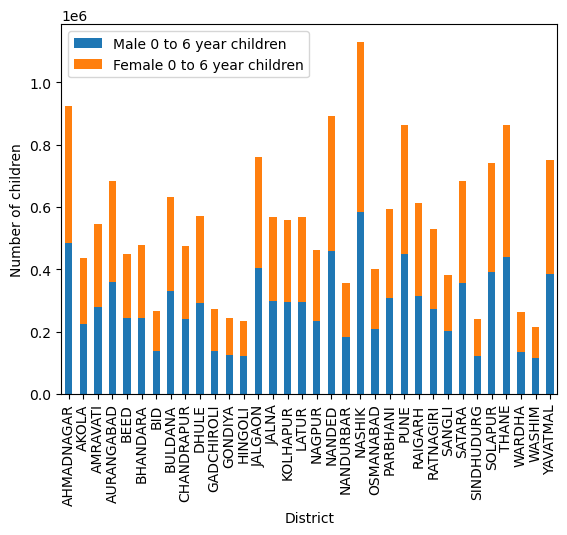

In [63]:
#14-stacked bar chart of male and female children aged 0 to 6 by district
children_by_district = dataset.groupby(['District'])['Male 0 to 6 year children', 'Female 0 to 6 year children'].sum()
children_by_district.plot(kind='bar', stacked=True)
plt.xlabel('District')
plt.ylabel('Number of children')
plt.show()

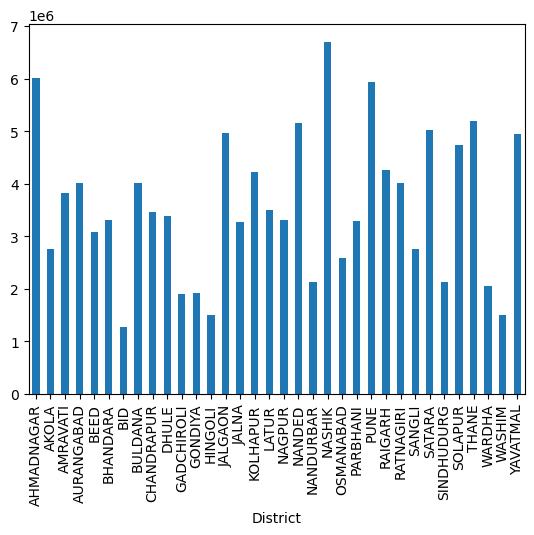

In [64]:
#15-bar chart of total population by district
population_by_district = dataset.groupby(['District'])['Total population'].sum()
population_by_district.plot(kind='bar')
plt.show()

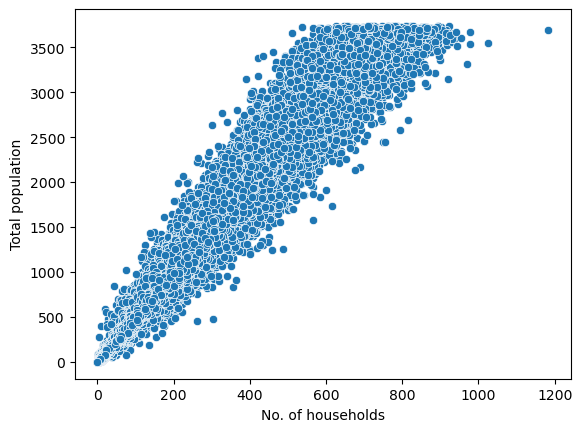

In [65]:
#16-scatter plot of total population by number of households
sns.scatterplot(x='No. of households', y='Total population', data=dataset)
plt.show()

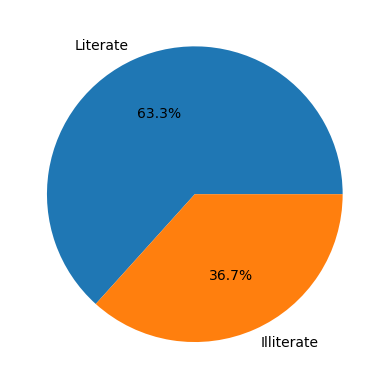

In [66]:
#17- pie chart of literate and illiterate individuals
literate_counts = dataset[['Total literates', 'Total iliterates']].sum()
plt.pie(literate_counts, labels=['Literate', 'Illiterate'], autopct='%1.1f%%')
plt.show()

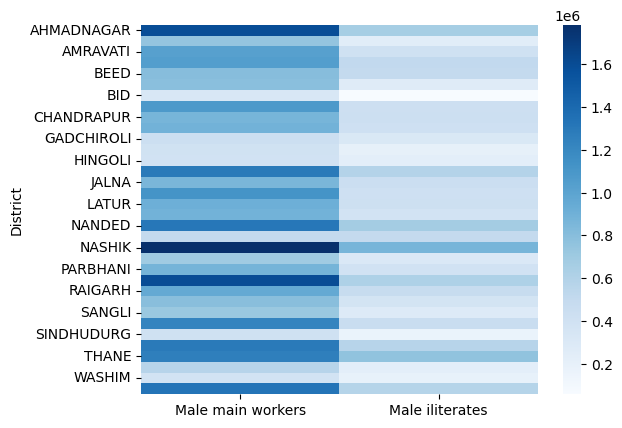

In [67]:
#18-heatmap between female main workers and female iliterates in each distinct
female_counts_by_district = dataset.groupby(['District'])[['Male main workers', 'Male iliterates']].sum()
sns.heatmap(female_counts_by_district, cmap='Blues')
plt.show()

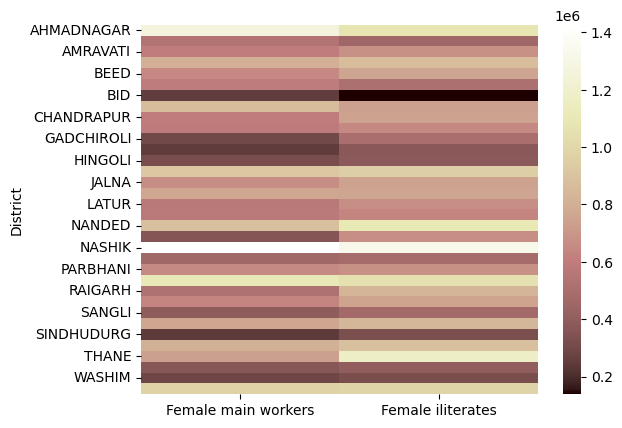

In [68]:
#19-heatmap between female main workers and female iliterates in each distinct
female_counts_by_district = dataset.groupby(['District'])[['Female main workers', 'Female iliterates']].sum()
sns.heatmap(female_counts_by_district, cmap='pink')
plt.show()

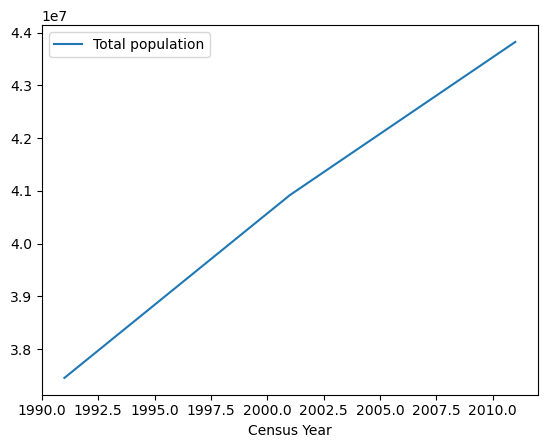

In [70]:
#20- line chart of literates by census year
df_literacy = dataset.groupby(['Census Year'])[['Total population']].sum()
df_literacy.plot(kind='line')
plt.show()